In [25]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from scipy.io import loadmat
from matplotlib.image import imread
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.2474 - accuracy: 0.9248 - val_loss: 0.1121 - val_accuracy: 0.9656
Epoch 2/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.1024 - accuracy: 0.9689 - val_loss: 0.0868 - val_accuracy: 0.9732
Epoch 3/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.0769 - val_accuracy: 0.9774
Epoch 4/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0738 - val_accuracy: 0.9804
Epoch 5/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0885 - val_accuracy: 0.9788
Epoch 6/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0844 - val_accuracy: 0.9791
Epoch 7/20
60000/60000 [==============================] 

In [2]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'score' is not defined

In [3]:
data = loadmat("emnist-letters.mat")
data = data['dataset']

In [4]:
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_train = data['test'][0,0]['labels'][0,0]

In [62]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.05, # Shift the pic width by a max of 5%
                               height_shift_range=0.05, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=False, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                              )

In [63]:
image = X_train[0]

In [64]:
image = image.reshape(28,28)

In [65]:
image.shape

(28, 28)

In [66]:
X_train.shape

(124800, 784)

In [67]:
X_train2 = X_train.reshape(124800, 28,28,1)

In [68]:
X_train2.shape

(124800, 28, 28, 1)

In [89]:
X_train3 = image_gen.flow(X_train2, batch_size=batch_size, shuffle=False)

In [90]:
a = X_train3[0]

In [91]:
a = a[0]

In [94]:
a = a.reshape(28,28)

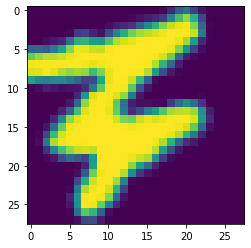

In [95]:
plt.imshow(a)

In [96]:
b = X_train[0]
b.shape

(784,)

In [98]:
b = b.reshape(28,28)

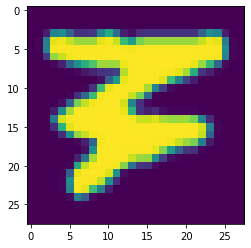

In [99]:
plt.imshow(b)